In [1]:
# Import Libraries for data cleaning & data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import the dataset

df = pd.read_csv(r"C:\Users\Lenovo\Datasets\Premier_League_Final_Data_batch2.csv")

# Exploring the dataset

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [2]:
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In [3]:
df.shape

(40, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


Data Cleaning

In [5]:
# Let's clean the data under Club column

df['Club'] = df['Club'].str.replace('\d+','',regex=True)
df.head()

#In this code, '\d+' is a regular expression pattern that matches 
#one or more digits at the start of the string. The str.replace() 
#method replaces this pattern with an empty string, effectively 
#removing the numbers from the front of each team name in the "Club" column.

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [6]:
# Let's clean the data under TeamLaunch coloumn
# convert the column to datetime format

df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'],format= 'mixed',errors='coerce')

# convert the column to YYYY format

df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

# The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'format' paramter is 
#set to 'mixed', since the data doesn't contain consistent format. i.e. 16 Oct 1878, 1861, Aug 1883). 

# The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

# The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format 
#code for the year. This line of code will create a new column 'column_name' in the format YYYY.

In [7]:
# Let's clean the Winnerrs and Runners-up column
df['Winners'].value_counts()

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

In [8]:

df['Runners-up'].value_counts()

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

In [9]:
# filling the null columns with zero
df['Winners'].fillna(0, inplace=True)

# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

In [10]:
df['Runners-up'].fillna(0,inplace=True)
df['Runners-up'].replace('-',0,inplace=True)

# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

# pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. 
#The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.
#The .astype() method to convert the "Runners-up" column to an "Int64" data type. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


In [11]:
# Let us extract only the year in lastplayed_pl column
df['lastplayed_pl'] = pd.to_datetime(df['lastplayed_pl'], format='%b-%y',errors='coerce')

#The "format" parameter specifies the expected format of the input string. 
#In this case '%b-%y' which indicates a three-letter month abbreviation followed by a two-digit year (e.g. "Mar-21"). 

df['lastplayed_pl'] = df['lastplayed_pl'].dt.strftime('%Y')


In [12]:
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0


In [13]:
# Team that has won Premier League 13 times and finished as Runners-up 7 times
df[df['Winners']==13]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023


EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Histogram of Matches Played')

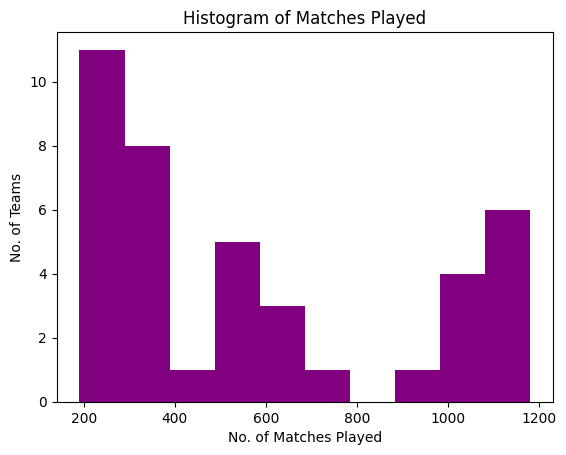

In [14]:
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(df['Matches Played'],color='purple')

# Add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('No. of Teams')
plt.title('Histogram of Matches Played')

In [15]:
#Upon analysis, we have observed that there are a total of 11 clubs who have significantly more experience in the Premier League as compared to the 
#others.These clubs have played a higher number of matches and have established themselves as experienced players in the league.
df[df['Matches Played'] > 900]['Club'].count()

11

In [16]:
#Let's drop the Clubs and reset the index

df = df[df['Matches Played'] < 900].reset_index(drop=True)
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


In [17]:
# Create new columns for Winning Rate, Loss Rate, Drawn Rate, & Clean Sheet Rate

df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505


In [18]:
# Create a column for average goals scored per match and round it to a whole number

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']
df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

In [19]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [20]:
df.shape

(29, 16)

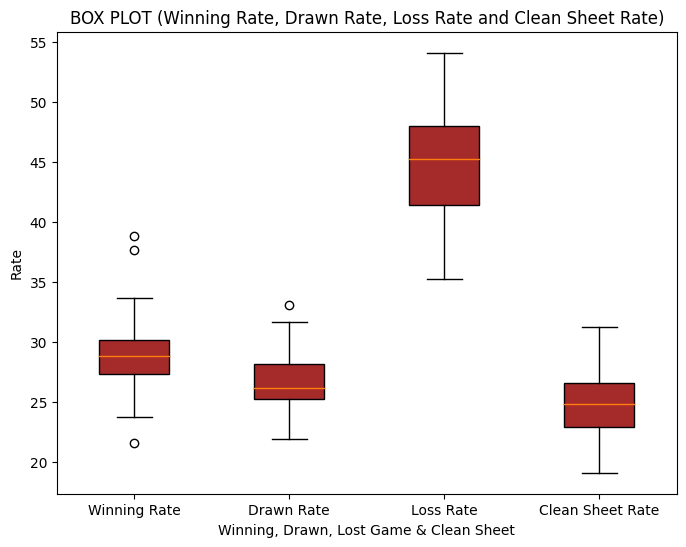

In [21]:
# Now let us visualize Winning Rate, Loss Rate, Drawn Rate, and Clean Sheet Rate
# Set the figure size
plt.figure(figsize=(8, 6))

boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'],
                       df['Clean Sheet Rate']], patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'],
                      boxprops = dict(facecolor = "brown"))

# Set the title and axis labels
plt.title('BOX PLOT (Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate)')
plt.xlabel('Winning, Drawn, Lost Game & Clean Sheet')
plt.ylabel('Rate')

plt.show()

In [22]:
# Winning Rate further analysis. Identify clubs with high winning rate
# Calculate the interquartile range for the "Winning Rate" column
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

34.4509109311741


In [23]:
# Identify the clubs with high winning rate
HighWinningRate_CLubs = df[(df['Winning Rate'] > upper_bound)]
HighWinningRate_CLubs

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


In [24]:
# Winning Rate further analysis. Identify club with low winning rate
# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

# Identify the clubs with lowest winning rate
LowWinningRate_Club = df[(df['Winning Rate'] < lower_bound)]
LowWinningRate_Club

23.01366396761133


,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


In [25]:
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
print(upper_bound)
# Identify the clubs with high winning rate
HighDrawnRate_CLubs = df[(df['Drawn Rate'] > upper_bound)]
HighDrawnRate_CLubs

32.46534167586799


,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [38]:
#Let's find out the clubs which has been a Winner and Runners-up
df[(df['Winners']==1) | (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0,0.0


In [27]:
df['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

In [28]:
# Let's us again analyse Matches Played Column for our reduced dataframe (29 clubs).
df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

In [29]:
# Let us look at "lastplayed_pl" column
df['lastplayed_pl'].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

In [30]:
# Let us check the 8 teams that are currently playing in the Premier League
df[df['lastplayed_pl']=='2023']['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

𝐓𝐡𝐞 𝐢𝐧𝐟𝐞𝐫𝐞𝐧𝐜𝐞 𝐨𝐛𝐭𝐚𝐢𝐧𝐞𝐝 𝐚𝐟𝐭𝐞𝐫 𝐄𝐃𝐀 𝐭𝐨 𝐛𝐮𝐢𝐥𝐝 𝐚 𝐟𝐫𝐚𝐦𝐞𝐰𝐨𝐫𝐤 𝐚𝐫𝐞,

⚽ **𝐇𝐈𝐆𝐇𝐄𝐒𝐓 𝐖𝐈𝐍𝐍𝐈𝐍𝐆 𝐑𝐀𝐓𝐄 :** 𝐋𝐞𝐞𝐝𝐬 𝐔𝐧𝐢𝐭𝐞𝐝 𝐚𝐧𝐝 𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬

⚽ **𝐋𝐎𝐖𝐄𝐒𝐓 𝐖𝐈𝐍𝐍𝐈𝐍𝐆 𝐑𝐀𝐓𝐄 :** 𝐇𝐮𝐥𝐥 𝐂𝐢𝐭𝐲

⚽ **𝐇𝐈𝐆𝐇𝐄𝐒𝐓 𝐃𝐑𝐀𝐖𝐍 𝐑𝐀𝐓𝐄 :** 𝐁𝐫𝐢𝐠𝐡𝐭𝐨𝐧 & 𝐇𝐨𝐯𝐞 𝐀𝐥𝐛𝐢𝐨𝐧

⚽ **𝐖𝐈𝐍𝐍𝐄𝐑𝐒 :** 𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬 𝐚𝐧𝐝 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲

⚽ **𝐑𝐔𝐍𝐍𝐄𝐑𝐒-𝐔𝐏 :** 𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬

⚽ **𝐀𝐕𝐄𝐑𝐀𝐆𝐄 𝐌𝐀𝐓𝐂𝐇𝐄𝐒 𝐏𝐋𝐀𝐘𝐄𝐃 :** 𝟑𝟕𝟐

⚽ **𝐍𝐎.𝐎𝐅 𝐓𝐄𝐀𝐌𝐒 𝐂𝐔𝐑𝐑𝐄𝐍𝐓𝐋𝐘 𝐀𝐂𝐓𝐈𝐕𝐄(𝟐𝟎𝟐𝟑) :** 𝟖

In [31]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Clean Sheet Rate" column
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

# Let's find the length of our updated DataFrame
len(df)

# Create a column to calculate the score wrt the length of the updated DataFrame
df['scores']=np.zeros(len(df))
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [42]:
df.loc[df['Matches Played'] >= 372, 'scores'] += 10
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (df['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

In [43]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,25.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,15.0


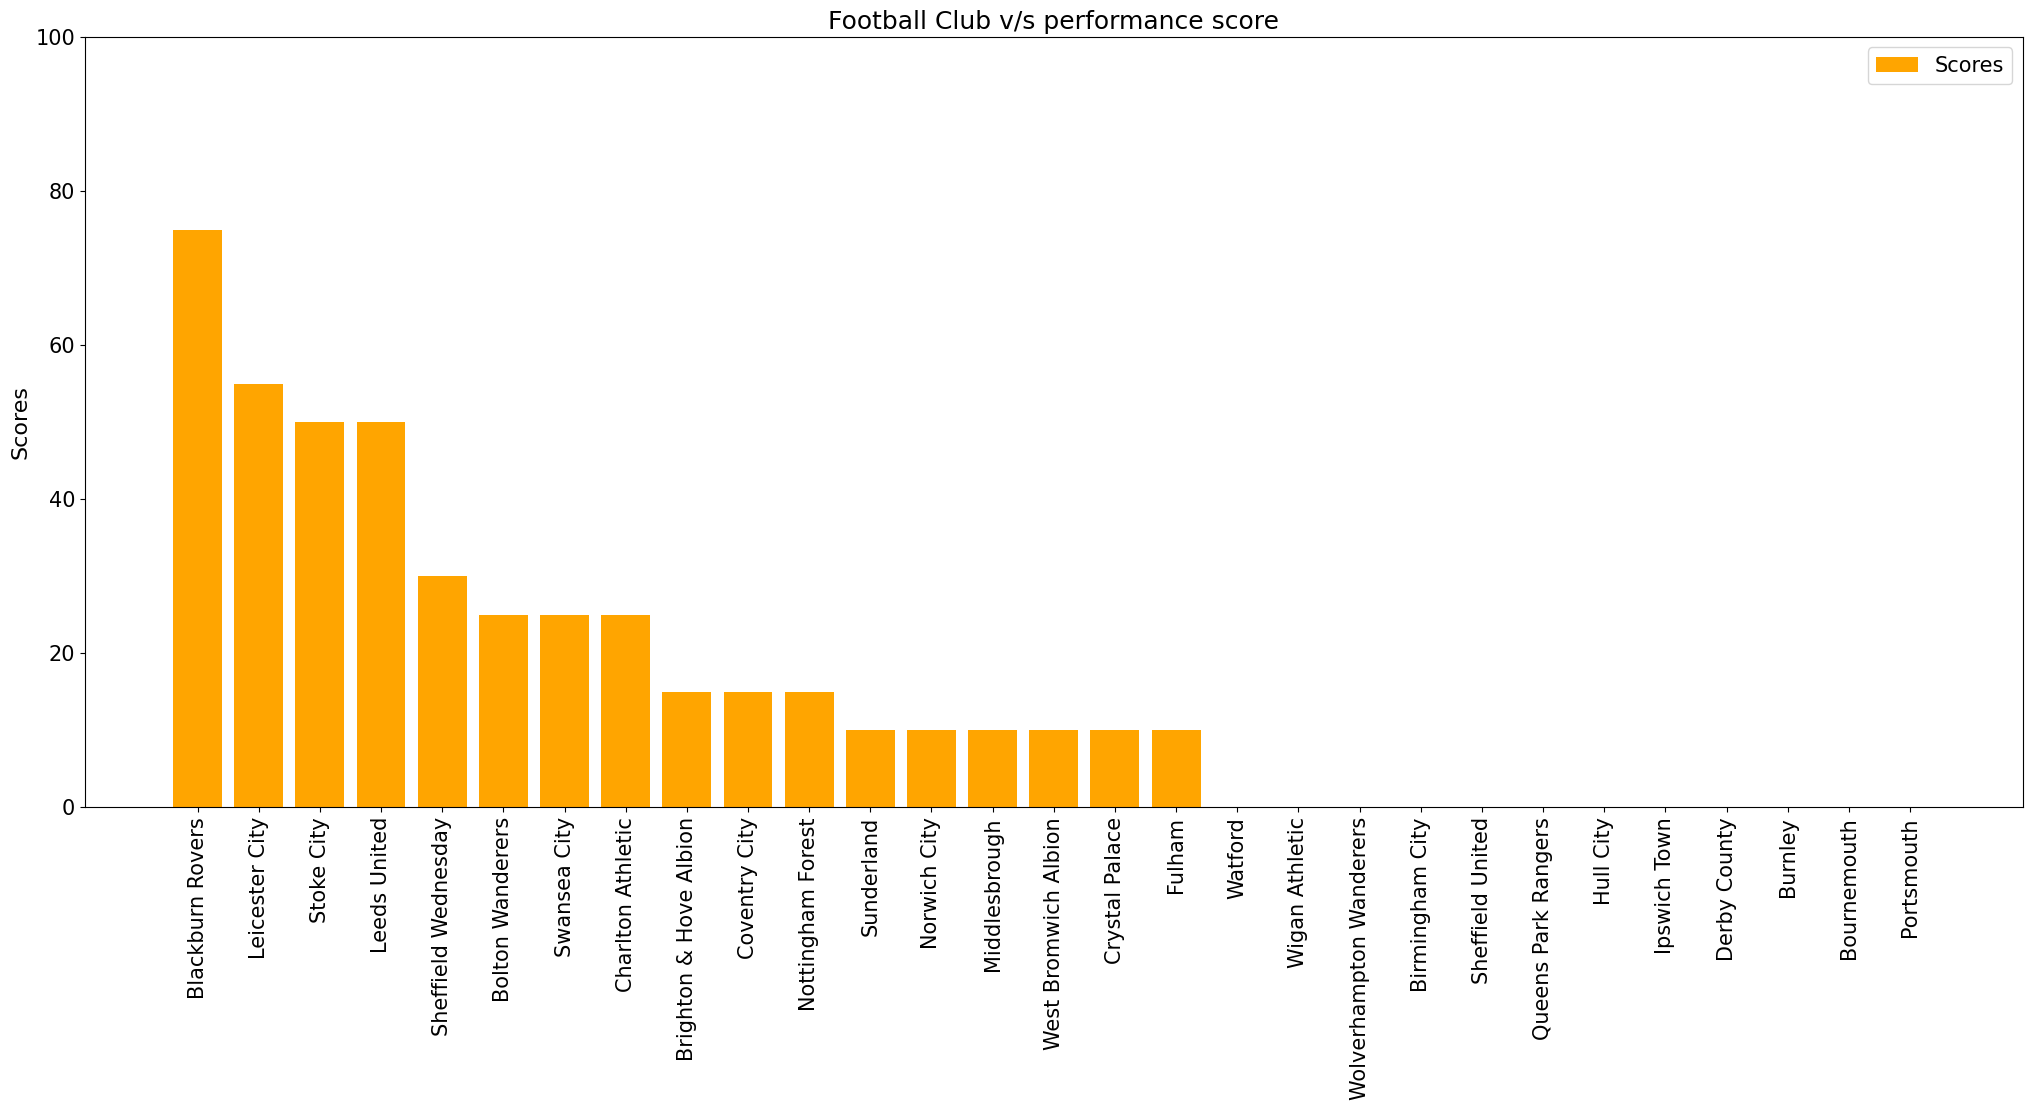

In [49]:
# sort the DataFrame by score in descending order
df_sort = df.sort_values(by='scores', ascending=False)
# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='orange')
# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=15)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

𝑩𝒂𝒔𝒆𝒅 𝒐𝒏 𝒂𝒃𝒐𝒗𝒆 𝒄𝒉𝒂𝒓𝒕-
📌 𝐇𝐈𝐆𝐇𝐄𝐒𝐓 𝐒𝐂𝐎𝐑𝐄 : **𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬**
📌 𝐍𝐄𝐗𝐓 𝐁𝐄𝐒𝐓 : **𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲**

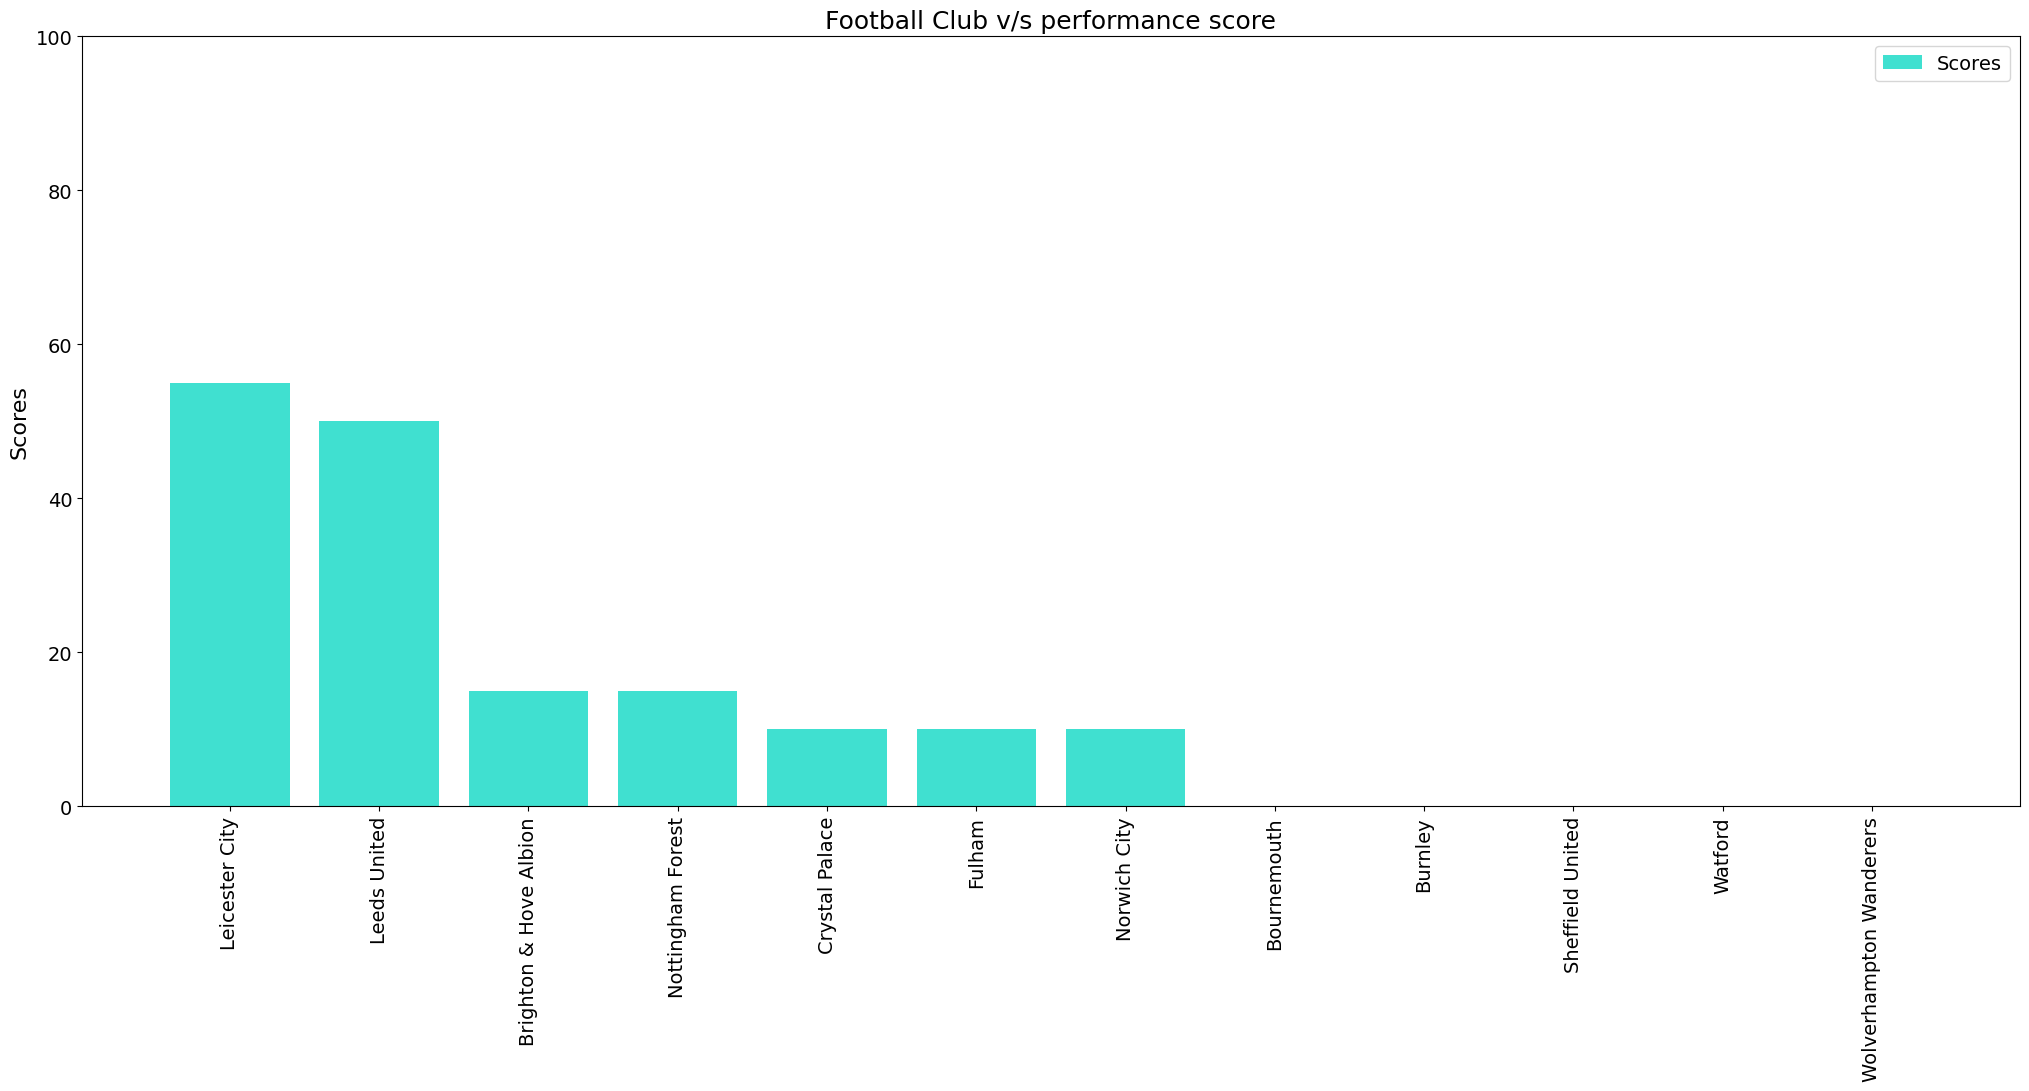

In [50]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']=='2023') | (df['lastplayed_pl']=='2022') | (df['lastplayed_pl']=='2021')].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='turquoise')
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)
plt.legend(['Scores'], fontsize=14)
# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

In [51]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: object

📌 **𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬 𝐥𝐚𝐬𝐭 𝐩𝐥𝐚𝐲𝐞𝐝 𝐢𝐧 𝐭𝐡𝐞 𝐭𝐨𝐮𝐫𝐧𝐚𝐦𝐞𝐧𝐭 𝐢𝐧 𝟐𝟎𝟏𝟐,** 𝐰𝐡𝐢𝐜𝐡 𝐰𝐚𝐬 𝐪𝐮𝐢𝐭𝐞 𝐬𝐨𝐦𝐞 𝐭𝐢𝐦𝐞 𝐚𝐠𝐨.

📍𝐂𝐎𝐍𝐂𝐋𝐔𝐒𝐈𝐎𝐍

**𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬 𝐥𝐚𝐬𝐭 𝐩𝐥𝐚𝐲𝐞𝐝 𝐢𝐧 𝐭𝐡𝐞 𝐭𝐨𝐮𝐫𝐧𝐚𝐦𝐞𝐧𝐭 𝐢𝐧 𝟐𝟎𝟏𝟐,** 𝐰𝐡𝐢𝐜𝐡 𝐰𝐚𝐬 𝐪𝐮𝐢𝐭𝐞 𝐬𝐨𝐦𝐞 𝐭𝐢𝐦𝐞 𝐚𝐠𝐨. 𝐆𝐢𝐯𝐞𝐧 𝐭𝐡𝐢𝐬 𝐢𝐧𝐟𝐨𝐫𝐦𝐚𝐭𝐢𝐨𝐧, 𝐰𝐞 𝐫𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝 𝐭𝐡𝐚𝐭 𝐬𝐭𝐚𝐤𝐞𝐡𝐨𝐥𝐝𝐞𝐫𝐬 𝐜𝐨𝐧𝐬𝐢𝐝𝐞𝐫 **𝐢𝐧𝐯𝐞𝐬𝐭𝐢𝐧𝐠 𝐢𝐧 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲 𝐢𝐧𝐬𝐭𝐞𝐚𝐝. 𝐖𝐞 𝐛𝐞𝐥𝐢𝐞𝐯𝐞 𝐭𝐡𝐚𝐭 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲’𝐬 𝐫𝐞𝐜𝐞𝐧𝐭 𝐟𝐨𝐫𝐦 𝐚𝐧𝐝 𝐩𝐞𝐫𝐟𝐨𝐫𝐦𝐚𝐧𝐜𝐞 𝐦𝐚𝐤𝐞 𝐭𝐡𝐞𝐦 𝐚 𝐛𝐞𝐭𝐭𝐞𝐫 𝐜𝐡𝐨𝐢𝐜𝐞 𝐟𝐨𝐫 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞𝐧𝐭.**
𝐓𝐨 𝐬𝐮𝐩𝐩𝐨𝐫𝐭 𝐨𝐮𝐫 𝐜𝐥𝐚𝐢𝐦, 𝐰𝐞 𝐰𝐢𝐥𝐥 𝐜𝐨𝐧𝐝𝐮𝐜𝐭 **𝐟𝐮𝐫𝐭𝐡𝐞𝐫 𝐬𝐞𝐜𝐨𝐧𝐝𝐚𝐫𝐲 𝐫𝐞𝐬𝐞𝐚𝐫𝐜𝐡 𝐭𝐨 𝐩𝐫𝐨𝐯𝐢𝐝𝐞 𝐚𝐝𝐝𝐢𝐭𝐢𝐨𝐧𝐚𝐥 𝐞𝐯𝐢𝐝𝐞𝐧𝐜𝐞 𝐨𝐟 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲’𝐬 𝐜𝐮𝐫𝐫𝐞𝐧𝐭 𝐟𝐨𝐫𝐦 𝐚𝐧𝐝 𝐩𝐨𝐭𝐞𝐧𝐭𝐢𝐚𝐥 𝐟𝐨𝐫 𝐬𝐮𝐜𝐜𝐞𝐬𝐬.**

𝐀𝐜𝐜𝐨𝐫𝐝𝐢𝐧𝐠 𝐭𝐨 𝐨𝐮𝐫 𝐫𝐞𝐬𝐞𝐚𝐫𝐜𝐡, **𝐁𝐥𝐚𝐜𝐤𝐛𝐮𝐫𝐧 𝐑𝐨𝐯𝐞𝐫𝐬** 𝐰𝐞𝐫𝐞 𝐫𝐞𝐥𝐞𝐠𝐚𝐭𝐞𝐝 𝐭𝐨 𝐭𝐡𝐞 𝐂𝐡𝐚𝐦𝐩𝐢𝐨𝐧𝐬𝐡𝐢𝐩 𝐥𝐞𝐚𝐠𝐮𝐞 𝐢𝐧 𝟐𝟎𝟏𝟐 𝐢.𝐞., 𝐥𝐞𝐚𝐠𝐮𝐞 𝐛𝐞𝐥𝐨𝐰 𝐏𝐫𝐞𝐦𝐢𝐞𝐫 𝐋𝐞𝐚𝐠𝐮𝐞 𝐚𝐧𝐝 𝐥𝐚𝐭𝐞𝐫 𝐭𝐨 𝐋𝐞𝐚𝐠𝐮𝐞 𝐎𝐧𝐞 𝐢𝐧 𝟐𝟎𝟏𝟕 𝐢.𝐞., 𝐥𝐞𝐚𝐠𝐮𝐞 𝐛𝐞𝐥𝐨𝐰 𝐂𝐡𝐚𝐦𝐩𝐢𝐨𝐧𝐬𝐡𝐢𝐩 𝐥𝐞𝐚𝐠𝐮𝐞. 𝐇𝐨𝐰𝐞𝐯𝐞𝐫, 𝐭𝐡𝐞𝐲 𝐰𝐞𝐫𝐞 𝐩𝐫𝐨𝐦𝐨𝐭𝐞𝐝 𝐛𝐚𝐜𝐤 𝐭𝐨 𝐭𝐡𝐞 𝐂𝐡𝐚𝐦𝐩𝐢𝐨𝐧𝐬𝐡𝐢𝐩 𝐢𝐧 𝟐𝟎𝟏𝟖 𝐚𝐧𝐝 𝐡𝐚𝐯𝐞 𝐬𝐢𝐧𝐜𝐞 𝐟𝐢𝐧𝐢𝐬𝐡𝐞𝐝 𝐢𝐧 𝐭𝐡𝐞 𝐦𝐢𝐝𝐝𝐥𝐞 𝐨𝐟 𝐭𝐡𝐞 𝐭𝐚𝐛𝐥𝐞 𝐢𝐧 𝐫𝐞𝐜𝐞𝐧𝐭 𝐲𝐞𝐚𝐫𝐬. 𝐆𝐢𝐯𝐞𝐧 𝐭𝐡𝐞𝐢𝐫 **𝐢𝐧𝐜𝐨𝐧𝐬𝐢𝐬𝐭𝐞𝐧𝐭 𝐩𝐞𝐫𝐟𝐨𝐫𝐦𝐚𝐧𝐜𝐞 𝐚𝐧𝐝 𝐥𝐚𝐜𝐤 𝐨𝐟 𝐩𝐫𝐞𝐬𝐞𝐧𝐜𝐞 𝐢𝐧 𝐭𝐡𝐞 𝐏𝐫𝐞𝐦𝐢𝐞𝐫 𝐋𝐞𝐚𝐠𝐮𝐞 𝐬𝐢𝐧𝐜𝐞 𝟐𝟎𝟏𝟐, 𝐢𝐭 𝐰𝐨𝐮𝐥𝐝 𝐛𝐞 𝐢𝐧𝐚𝐩𝐩𝐫𝐨𝐩𝐫𝐢𝐚𝐭𝐞 𝐭𝐨 𝐫𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝 𝐭𝐡𝐢𝐬 𝐜𝐥𝐮𝐛 𝐟𝐨𝐫 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞𝐧𝐭.**

𝐎𝐧 𝐭𝐡𝐞 𝐨𝐭𝐡𝐞𝐫 𝐡𝐚𝐧𝐝, **𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲, 𝐭𝐡𝐞 𝟐𝟎𝟏𝟔 𝐏𝐫𝐞𝐦𝐢𝐞𝐫 𝐋𝐞𝐚𝐠𝐮𝐞 𝐜𝐡𝐚𝐦𝐩𝐢𝐨𝐧𝐬, 𝐡𝐚𝐯𝐞 𝐜𝐨𝐧𝐬𝐢𝐬𝐭𝐞𝐧𝐭𝐥𝐲 𝐟𝐢𝐧𝐢𝐬𝐡𝐞𝐝 𝐢𝐧 𝐭𝐡𝐞 𝐭𝐨𝐩 𝟏𝟎 𝐢𝐧 𝐫𝐞𝐜𝐞𝐧𝐭 𝐲𝐞𝐚𝐫𝐬.** 𝐓𝐡𝐞𝐲 𝐩𝐥𝐚𝐜𝐞𝐝 𝟓𝐭𝐡 𝐢𝐧 𝐛𝐨𝐭𝐡 𝐭𝐡𝐞 𝟐𝟎𝟏𝟗–𝟐𝟎𝟐𝟎 𝐚𝐧𝐝 𝟐𝟎𝟐𝟎–𝟐𝟎𝟐𝟏 𝐬𝐞𝐚𝐬𝐨𝐧𝐬 𝐚𝐧𝐝 𝐟𝐢𝐧𝐢𝐬𝐡𝐞𝐝 𝟖𝐭𝐡 𝐢𝐧 𝟐𝟎𝟐𝟏–𝟐𝟎𝟐𝟐. **𝐖𝐢𝐭𝐡 𝐬𝐮𝐟𝐟𝐢𝐜𝐢𝐞𝐧𝐭 𝐟𝐢𝐧𝐚𝐧𝐜𝐢𝐚𝐥 𝐛𝐚𝐜𝐤𝐢𝐧𝐠, 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲 𝐡𝐚𝐬 𝐭𝐡𝐞 𝐩𝐨𝐭𝐞𝐧𝐭𝐢𝐚𝐥 𝐭𝐨 𝐚𝐜𝐡𝐢𝐞𝐯𝐞 𝐞𝐯𝐞𝐧 𝐠𝐫𝐞𝐚𝐭𝐞𝐫 𝐬𝐮𝐜𝐜𝐞𝐬𝐬 𝐢𝐧 𝐭𝐡𝐞 𝐧𝐞𝐚𝐫 𝐟𝐮𝐭𝐮𝐫𝐞.**

𝐓𝐡𝐞𝐫𝐞𝐟𝐨𝐫𝐞, 𝐢𝐭 𝐰𝐨𝐮𝐥𝐝 𝐛𝐞 𝐫𝐞𝐚𝐬𝐨𝐧𝐚𝐛𝐥𝐞 𝐭𝐨 𝐫𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝 𝐋𝐞𝐢𝐜𝐞𝐬𝐭𝐞𝐫 𝐂𝐢𝐭𝐲 𝐭𝐨 𝐨𝐮𝐫 𝐜𝐥𝐢𝐞𝐧𝐭𝐬.